EDA - Exploratory Data Analysis.
 - Como transformar dados em informação útil e com significado para o negócio

- entendendo as variáveis
- limpando o conjunto de dados
- analisando as relações entre dados

In [1]:
#Importando as bibliotecas para fazer o EDA
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Verificando a estrutura dos dados
train_DF = pd.read_csv("train.csv") 
train_DF = train_DF.drop(columns="PassengerId")
train_DF.head()


FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

Verificando a presença de dados nulos/faltantes na base de dados, além da verificação dos Dtypes, observando se os dados foram corretamente interpretatos pelo pandas.

In [ ]:
train_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [ ]:
train_DF.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
print("Existem {:.2f}% de dados faltantes na coluna de idade e {:.2f}% na coluna de Cabine." .format(177/891*100, 687/891*100))
print(f"A coluna Pclass está mal compreendida, pois apesar de um número, 3 não é necessariamente melhor do que 2. As outras colunas apresentam dados coerentes.")

Existem 19.87% de dados faltantes na coluna de idade e 77.10% na coluna de Cabine.
A coluna Pclass está mal compreendida, pois apesar de um número, 3 não é necessariamente melhor do que 2. As outras colunas apresentam dados coerentes.


Verificando as médias, dispersões, quartis e possíveis outliers da base de dados, a fim de guiar as próximas etapas como o próprio pré processamento.

In [ ]:
train_DF.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


A coluna "Parch" e "Fare" são possíveis candidatos à presença de outliers, necessário observar a distribuição desses dados.

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

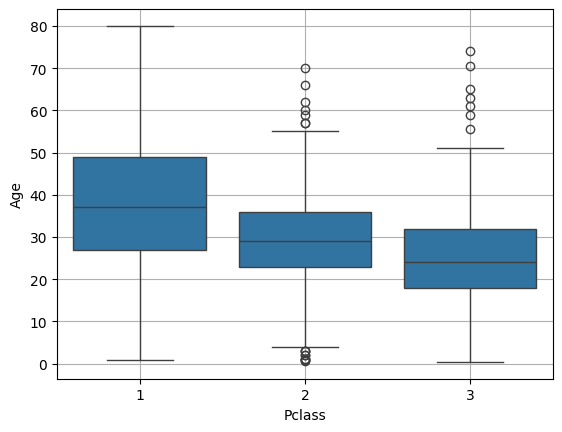

In [ ]:
# Como há duas principais colunas com valores vazios, é melhor preenche-los de alguma forma, já que excluir essa linhas não seria uma boa ideia

# Tentando outra alternativa de preenchimento:

# Analisando as médias de idade de cada classe social
sns.boxplot(data= train_DF, x = "Pclass", y = "Age")
plt.grid(True)
# Verificando com maior precisão o valor médio das idades de cada classe social:
# Calculando a média de idade por classe social (Pclass)
mean_age = train_DF.groupby('Pclass')['Age'].mean()
mean_age


Verifica-se que a média de idade por classe social segue um certo padrão, pessoas da primeira classe são mais velhas do que comparadas às da segunda classe, que por sua vez são mais velhas que as pessoas da terceira classe.

In [ ]:
# Função para preencher os valores nulos de idade com a média da idade com base na classe social
def fill_missing_age(row):
    if pd.isnull(row['Age']):
        return mean_age[row['Pclass']]
    else:
        return row['Age']

# Aplicando a função a cada linha dos dados
train_DF['Age'] = train_DF.apply(fill_missing_age, axis=1)


In [ ]:
# Preenchendo os valores nulos da coluna "Cabin" com dados sintéticos (-1)
train_DF["Cabin"].fillna(-1, inplace= True) # Preenchendo nulls com -1, já fazendo a alteração no DF
train_DF.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    2
dtype: int64

Text(0.5, 1.0, 'Quantidade de sobreviventes ao Naufrágio')

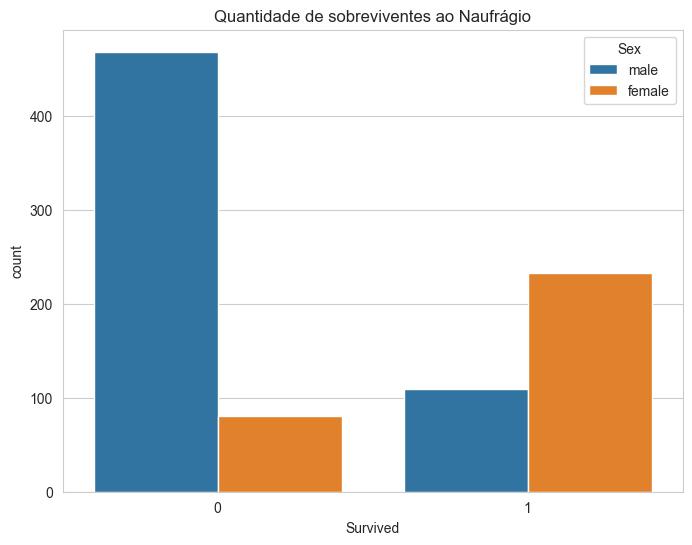

In [ ]:
# Observando a relação de passageiros que sobreviveram ou não ao naufrágio.
sns.set_style("whitegrid")
#sns.color_palette("tab10")
#sns.color_palette("mako", as_cmap=True)

#sns.set_palette(["blue", "orange"])
sns.set_palette("tab10")
plt.figure(figsize=(8,6))
sns.countplot(train_DF, x= "Survived", hue= "Sex").set_title("Quantidade de sobreviventes ao Naufrágio")

Sobreviveram muito mais mulheres do que homens deste acidente, apesar da quantidade total de homens ser muito maior.

<Axes: xlabel='Survived', ylabel='count'>

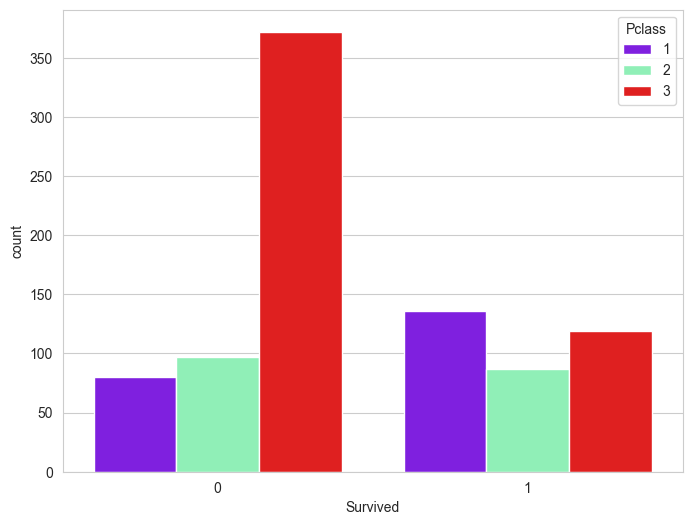

In [ ]:
# Observando agora a distribuição de sobreviventes e não sobreviventes em relação a classe:
plt.figure(figsize=(8,6))
sns.countplot(data= train_DF, x= "Survived", hue = "Pclass", palette= "rainbow")


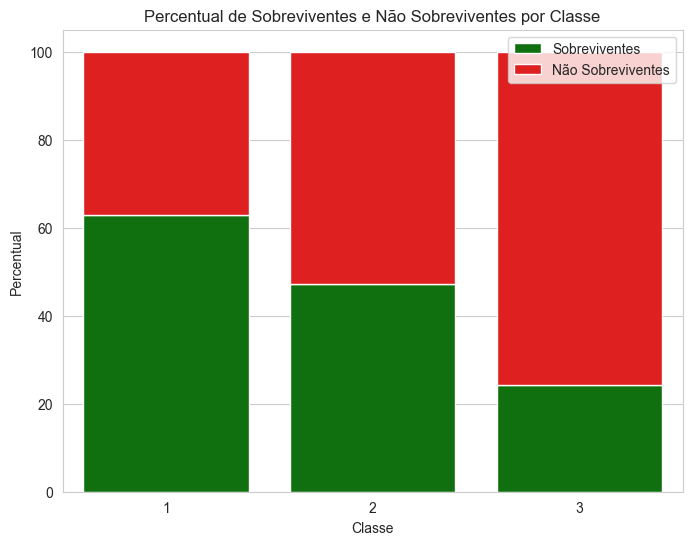

In [ ]:

# Calculando os percentuais de sobreviventes e não sobreviventes por classe
total_per_class = train_DF.groupby('Pclass')['Survived'].count()
percent_survived_per_class = train_DF.groupby('Pclass')['Survived'].mean() * 100
percent_not_survived_per_class = 100 - percent_survived_per_class

# Criando o gráfico
plt.figure(figsize=(8,6))
sns.barplot(x=total_per_class.index, y=percent_survived_per_class, color='green', label='Sobreviventes')
sns.barplot(x=total_per_class.index, y=percent_not_survived_per_class, bottom=percent_survived_per_class, color='red', label='Não Sobreviventes')
plt.title('Percentual de Sobreviventes e Não Sobreviventes por Classe')
plt.xlabel('Classe')
plt.ylabel('Percentual')
plt.legend()
plt.show()


É possível notar que, apesar da terceira classe ter sido grande maioria no Navio, com quase 500 pessoas, sobreviveram pouco mais de 100. Enquanto da primeira classe sobreviveu a maioria e da segunda classe sobreviveram pouco menos da metade.

<Axes: xlabel='Age', ylabel='Count'>

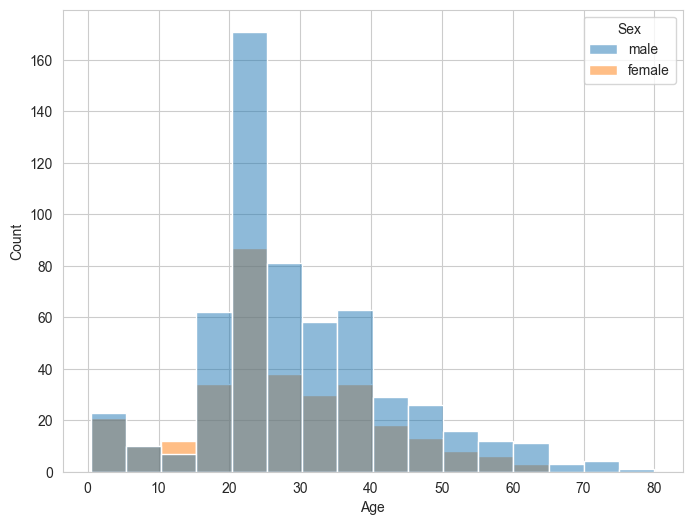

In [ ]:
# Observando a distribuição de idades dos passageiros
plt.figure(figsize=(8,6))
sns.histplot(data= train_DF, x = "Age", hue= "Sex", binwidth= 5)# multiple='stack'
#kde plot

<Axes: xlabel='Age', ylabel='Count'>

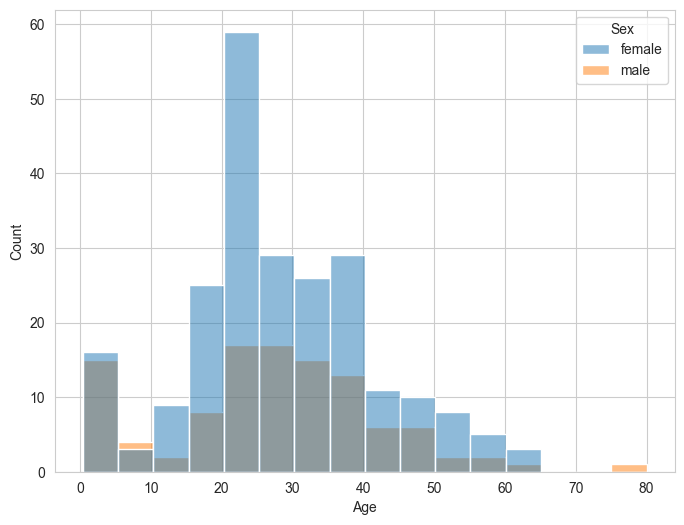

In [ ]:
#Vamos verificar a distribuição das pessoas que sobreviveram
survivors = train_DF.loc[train_DF["Survived"] == 1]

plt.figure(figsize=(8,6))
sns.histplot(data= survivors, x = "Age", hue= "Sex", binwidth= 5)# multiple='stack'

É possível observar que sobreviveram mais mulheres em todas as faixas etárias de modo geral.

<Axes: xlabel='SibSp', ylabel='count'>

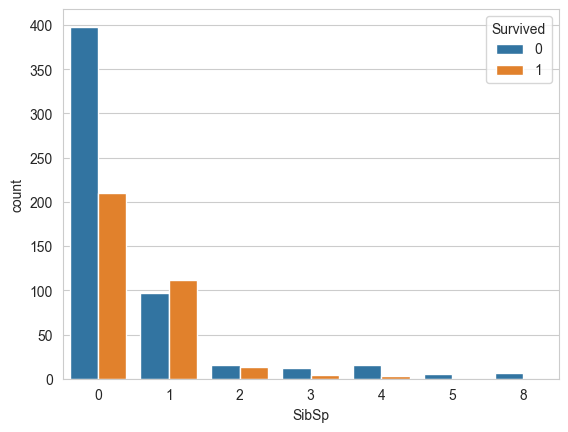

In [ ]:
# Observando se há relação entre Irmãos ou conjuge e sobrevivencia
sns.countplot(data=train_DF, x= "SibSp", hue="Survived")

É possível notar que a maioria das pessoas não tinham irmãos ou conjuges a bordo do navio. Porém, quem tinha o número 1 ou 2 nesse tipo de dado, tiveram uma taxa maior de sobrevivência.

<Axes: xlabel='Parch', ylabel='count'>

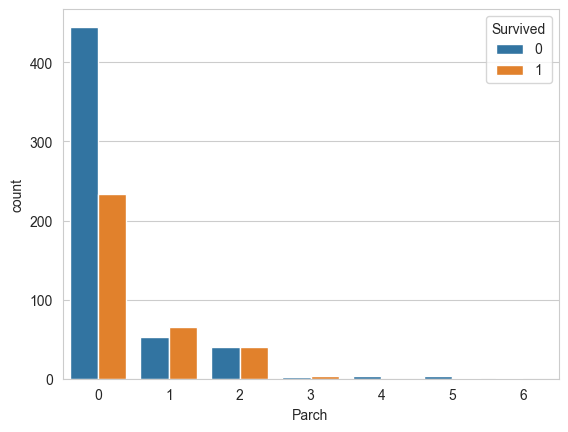

In [ ]:
# Observando se há relação entre Pais ou Filhos e sobrevivencia
sns.countplot(data=train_DF, x= "Parch", hue="Survived")

A maioria das pessoas não estavam a bordo com pais ou filhos, mas observando os que estavam, tiveram uma taxa de sobrevivência muito maior, desconsiderando os passageiros com 4 ou mais nesse tipo de dado

<Axes: xlabel='Embarked', ylabel='count'>

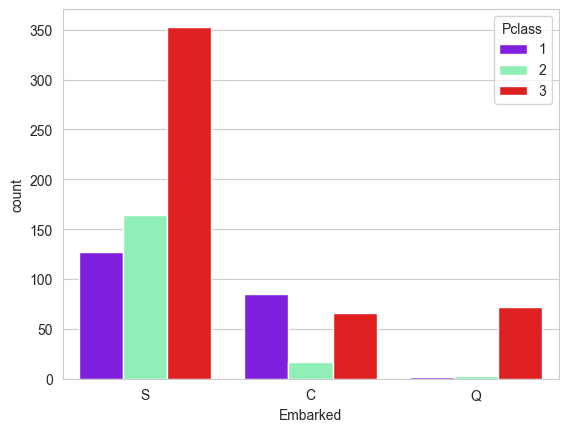

In [ ]:
# Observando 
sns.countplot(data= train_DF, x= "Embarked", hue = "Pclass", palette= "rainbow")
#sns.lmplot(data = train_DF, x = "Fare", y = "Survived")

A grande maioria das pessoas embarcou no porto S, principalmente as da terceira classe. Menos da metade dos passageiros da primeira classe embarcaram também no porto C, e a grande maioria dos passageiros que embarcaram no porto Q eram da terceira classe.

<Axes: xlabel='Fare', ylabel='Count'>

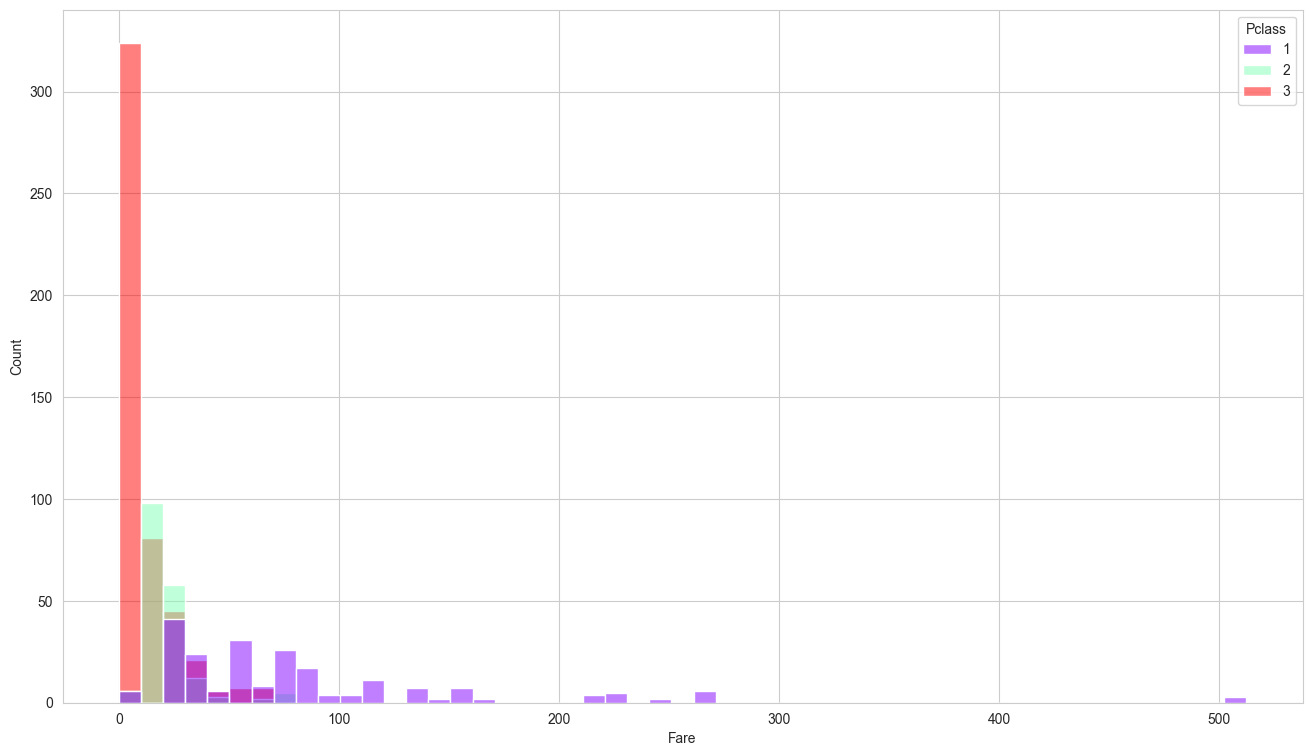

In [ ]:
# Observando a distribuição dos preços das passagens
plt.figure(figsize=(16,9))
sns.histplot(data= train_DF, x= "Fare",binwidth= 10, hue= "Pclass", palette= "rainbow")
#aumentar figura e kde

A grande maioria dos passageiros não pagou pela passagem, e eram da terceira classe. A classe que pagou mais caro em suas passagens era da primeira classe.

<Axes: xlabel='Age', ylabel='Count'>

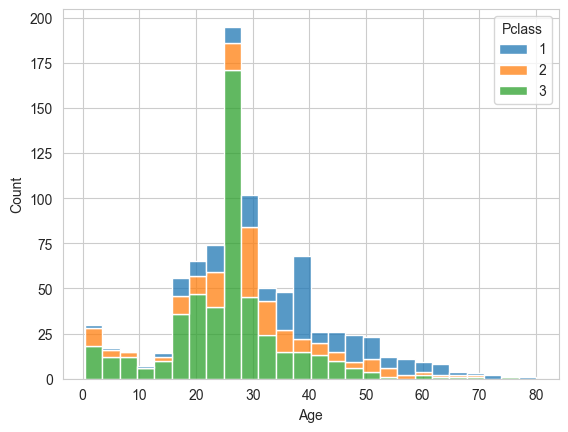

In [ ]:
#Checando a relação entre idade e classe
sns.histplot(data= train_DF, x = "Age", hue= "Pclass", palette= "tab10" , multiple= "stack")

In [ ]:
# Observando se há relação entre cabines vazias e classe social
cabines_nulas = train_DF.loc[train_DF["Cabin"] == -1]
cabines_nulas["Pclass"].value_counts()


Pclass
3    479
2    168
1     40
Name: count, dtype: int64

Text(0.5, 1.0, 'Cabines Nulas')

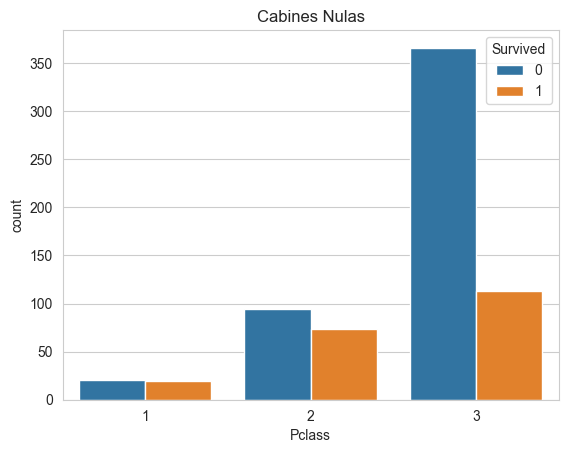

In [ ]:
# Visualizando a relação entre a sobrevivência ou não sobrevivência às cabines nulas
sns.countplot(data= cabines_nulas, x = "Pclass", hue= "Survived").set_title("Cabines Nulas")


A maioria das cabines nulas pertencem a terceira classe, que foi a mais afetada pelo naufrágio do Titanic. Apesar disso, algumas pessoas da primeira e segunda classes também não tinham cabines definidas

Pclass
1    176
2     16
3     12
Name: count, dtype: int64

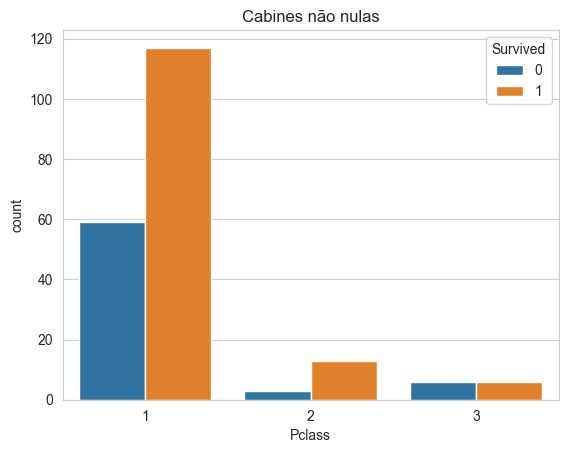

In [ ]:
cabines_nao_nulas = train_DF.loc[train_DF["Cabin"] != -1]
sns.countplot(data= cabines_nao_nulas, x = "Pclass", hue= "Survived").set_title("Cabines não nulas")

cabines_nao_nulas["Pclass"].value_counts()

A Grande maioria dos tickets que tinham cabines definidas eram da 1ª classe, enquanto a maioria da segunda e terceira classe não tinham especificação de cabines

In [ ]:
train_DF.head(10) #regex (futuramente)
#trazer graficos com %, direcionamento de pensamento
#principais insights, conclusão

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,-1,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,-1,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,-1,S
5,0,3,"Moran, Mr. James",male,25.14062,0,0,330877,8.4583,-1,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,349909,21.0750,-1,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00000,0,2,347742,11.1333,-1,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00000,1,0,237736,30.0708,-1,C


In [ ]:
#proximos passos: feature engineer, o valor da taxa / media da taxa da classe (pós train split), taxa * SibSp
# pre processamento - tratamento de nulos, encoders, novas variaveis,
# entrada da base original -> pre processamento -> base de saida preparada para modelagem

# modificações do EDA que devem ser realizadas: 
# colocar graficos reflativizados (%), trazer graficos KDE, aprender sobre, escrever mais sobre o porque de cada coisa. 
# Preenchimento de missing values deve ser movido para o notebook de pre processing 

## Conclusão

